# Texas Student-Teacher Race Match Data Exploration

**Dataset:** Student-Teacher Race Match from Texas public schools (2022-23)  
**Source:** TEA TAPR data, ~8,691 schools, 5.4M students

To run this notebook:
1. Activate the virtual environment: `source venv/bin/activate`
2. Ensure pandas is installed: `pip install pandas`
3. Run all cells

In [1]:
import pandas as pd

# Load the CSV (file is in project root; README mentions data/texasdata.csv but files are at root)
df = pd.read_csv('texasdata.csv')

df.head(10)

,campusName,campusNumber,countyName,countyNumber,districtName,districtNumber,region,schoolLevel,grade_lo,grade_hi,charterSchool,locationType,studentsTotal,teachersTotal,s_econ_disadv_prop,race,student_frac,teacher_frac,student_count
0,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,Black,0.035088,0.000000,6
1,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,Hispanic,0.105263,0.000000,18
2,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,white,0.807018,1.000000,138
3,CAYUGA MIDDLE,1902041,ANDERSON,1,CAYUGA ISD,1902,7,Middle,6,8,False,Rural-Remote,166,11.2,0.469880,Black,0.048193,0.000000,8
4,CAYUGA MIDDLE,1902041,ANDERSON,1,CAYUGA ISD,1902,7,Middle,6,8,False,Rural-Remote,166,11.2,0.469880,Hispanic,0.096386,0.000000,16
5,CAYUGA MIDDLE,1902041,ANDERSON,1,CAYUGA ISD,1902,7,Middle,6,8,False,Rural-Remote,166,11.2,0.469880,white,0.795181,1.000000,132
6,CAYUGA EL,1902103,ANDERSON,1,CAYUGA ISD,1902,7,Elementary,-1,5,False,Rural-Remote,256,17.9,0.550781,Black,0.054688,0.106145,14
7,CAYUGA EL,1902103,ANDERSON,1,CAYUGA ISD,1902,7,Elementary,-1,5,False,Rural-Remote,256,17.9,0.550781,Hispanic,0.085938,0.000000,22
8,CAYUGA EL,1902103,ANDERSON,1,CAYUGA ISD,1902,7,Elementary,-1,5,False,Rural-Remote,256,17.9,0.550781,white,0.816406,0.888268,209
9,ELKHART H S,1903001,ANDERSON,1,ELKHART ISD,1903,7,High School,9,12,False,Rural-Distant,315,35.7,0.469841,Black,0.038095,0.056022,12


In [14]:
from typing import Any

print("The following are the unique values for each column:")
for key in df.keys():
    print(f"{key}: {df[key].nunique()}")

The following are the unique values for each column:
campusName: 7915
campusNumber: 8691
countyName: 253
countyNumber: 253
districtName: 1193
districtNumber: 1204
region: 20
schoolLevel: 4
grade_lo: 15
grade_hi: 14
charterSchool: 2
locationType: 12
studentsTotal: 1724
teachersTotal: 1270
s_econ_disadv_prop: 7780
race: 3
student_frac: 20287
teacher_frac: 13477
student_count: 1341


In [11]:
len(set(list(df["campusNumber"].values)))

8691

## Enriched Data (with County Income)

The dataset has been enriched with **median household income** from Census ACS 2022 5-year estimates. Use `texasdata_enriched.csv` for analysis with income.

In [15]:
# Load enriched data (with county median household income)
df_enriched = pd.read_csv('texasdata_enriched.csv')
print('Enriched data shape:', df_enriched.shape)
print('Income range: $', df_enriched['median_household_income'].min(), '- $', df_enriched['median_household_income'].max())
df_enriched.head()

Enriched data shape: (26073, 20)
Income range: $ 27374.0 - $ 121303.0


,campusName,campusNumber,countyName,countyNumber,districtName,districtNumber,region,schoolLevel,grade_lo,grade_hi,charterSchool,locationType,studentsTotal,teachersTotal,s_econ_disadv_prop,race,student_frac,teacher_frac,student_count,median_household_income
0,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,Black,0.035088,0.0,6,57445.0
1,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,Hispanic,0.105263,0.0,18,57445.0
2,CAYUGA H S,1902001,ANDERSON,1,CAYUGA ISD,1902,7,High School,9,12,False,Rural-Remote,171,19.3,0.444444,white,0.807018,1.0,138,57445.0
3,CAYUGA MIDDLE,1902041,ANDERSON,1,CAYUGA ISD,1902,7,Middle,6,8,False,Rural-Remote,166,11.2,0.469880,Black,0.048193,0.0,8,57445.0
4,CAYUGA MIDDLE,1902041,ANDERSON,1,CAYUGA ISD,1902,7,Middle,6,8,False,Rural-Remote,166,11.2,0.469880,Hispanic,0.096386,0.0,16,57445.0


### Correlation: Economic Disadvantage vs County Income

How does school-level economic disadvantage relate to county median household income?

Pearson correlation: -0.410
Interpretation: As county median income increases, economic disadvantage proportion tends to decrease.


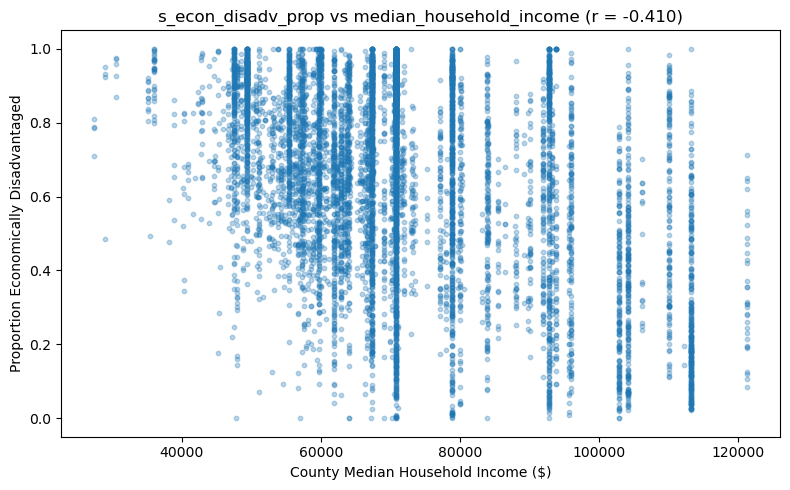

In [16]:
# One row per campus (s_econ_disadv_prop and median_household_income are campus-level)
campus_level = df_enriched.drop_duplicates(subset=['campusNumber'])

corr = campus_level['s_econ_disadv_prop'].corr(campus_level['median_household_income'])
print(f"Pearson correlation: {corr:.3f}")
print(f"Interpretation: As county median income increases, economic disadvantage proportion tends to {'decrease' if corr < 0 else 'increase'}.")

# Scatter plot (requires: pip install matplotlib)
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.scatter(campus_level['median_household_income'], campus_level['s_econ_disadv_prop'], alpha=0.3, s=10)
    plt.xlabel('County Median Household Income ($)')
    plt.ylabel('Proportion Economically Disadvantaged')
    plt.title(f's_econ_disadv_prop vs median_household_income (r = {corr:.3f})')
    plt.tight_layout()
    plt.show()
except ImportError:
    print("(Install matplotlib for scatter plot: pip install matplotlib)")

### Same-Race Teacher Representation in Disadvantaged Schools (Black & Hispanic)

For schools where a majority of students are economically disadvantaged, what % of teachers match the race of Black and Hispanic students? How does this vary with county income?

Average % same-race teachers in disadvantaged schools:
           mean  median
race                   
Black     13.77    5.10
Hispanic  36.37   26.97



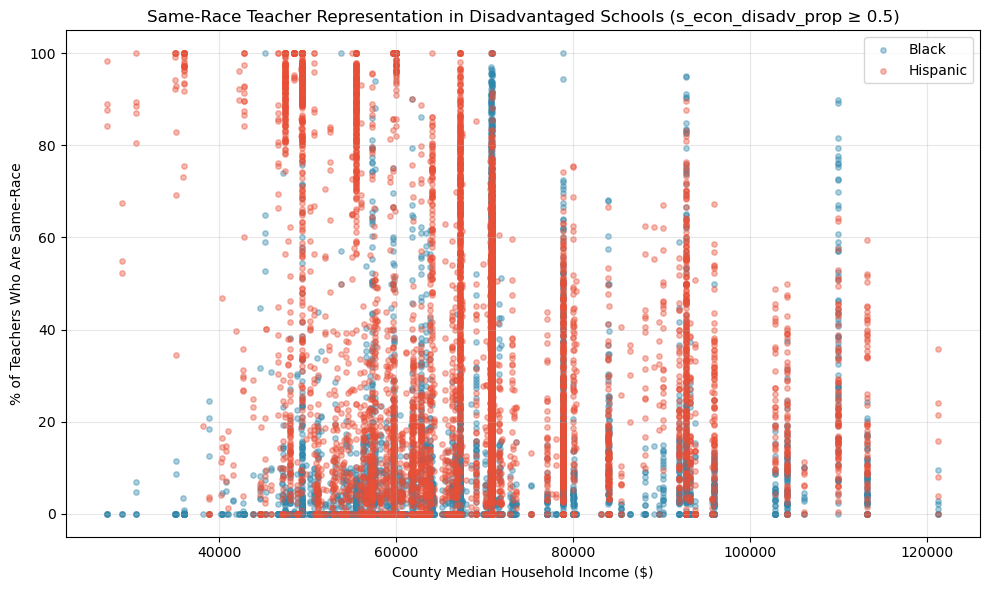

In [17]:
# Disadvantaged schools: majority economically disadvantaged (s_econ_disadv_prop >= 0.5)
disadv = df_enriched[df_enriched['s_econ_disadv_prop'] >= 0.5]
bh = disadv[disadv['race'].isin(['Black', 'Hispanic'])].copy()
bh['same_race_pct'] = bh['teacher_frac'] * 100  # % of teachers who are same-race

# Summary by race
print("Average % same-race teachers in disadvantaged schools:")
print(bh.groupby('race')['same_race_pct'].agg(['mean', 'median']).round(2))
print()

try:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 6))
    for race, color in [('Black', '#2E86AB'), ('Hispanic', '#E94F37')]:
        subset = bh[bh['race'] == race]
        ax.scatter(subset['median_household_income'], subset['same_race_pct'], 
                   alpha=0.4, s=15, label=race, c=color)
    ax.set_xlabel('County Median Household Income ($)')
    ax.set_ylabel('% of Teachers Who Are Same-Race')
    ax.set_title('Same-Race Teacher Representation in Disadvantaged Schools (s_econ_disadv_prop ≥ 0.5)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Install matplotlib for plot: pip install matplotlib")
    print(bh.groupby('race')[['same_race_pct', 'median_household_income']].agg(['mean', 'count']))

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '_

In [ ]:
# Basic info about the dataset
print('Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nData types:')
df.dtypes

In [ ]:
# Quick summary statistics
df.describe()